### Identifikasi Outlier (Use Boxplot & IQR)

- By Alif Dio A.

1. Import Library yang diperlukan

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Data yang akan digunakan

Data yang digunakan dalam contoh ini adalah data terkait tinggi badan (dalam satuan cm) yang terdiri dari 10 nilai. Data ini awalnya disusun dalam format List, kemudian diubah menjadi DataFrame menggunakan library Pandas, yang memungkinkan kita untuk melakukan analisis lebih lanjut pada data tersebut.

- Import by List

In [5]:
# # List data tinggi badan
# data = [150, 155, 160, 165, 170, 175, 180, 185, 200, 250]

# # Convert list menjadi dataframe
# df = pd.DataFrame(data, columns=['Height'])


- Import by .csv file

In [6]:
# Load dataset .csv
df = pd.read_csv('height_weight.csv')
df

,ID,Height,Weight
0,1,170,65
1,2,180,75
2,3,150,45
3,4,160,55
4,5,165,60
5,6,175,70
6,7,155,50
7,8,200,90
8,9,165,60
9,10,167,67


3. Melakukan plotting Boxplot

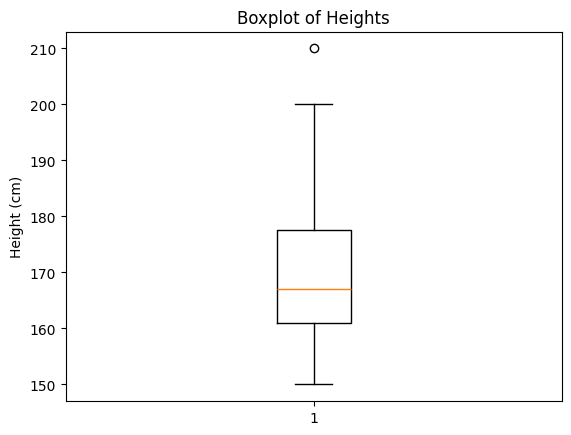

In [7]:
plt.boxplot(df['Height'])
plt.title("Boxplot of Heights")
plt.ylabel("Height (cm)")
plt.show()

4. Identifikasi outlier mengginakan IQR (Interquartile Range)

### Interquartile Range (Rentang Antar-Kuartil)
Interquartile Range (IQR) adalah ukuran statistik yang digunakan untuk menggambarkan sebaran nilai dalam dataset. IQR juga digunakan untuk mengidentifikasi data yang dianggap **outlier**.

#### Rumus IQR:
\[
IQR = Q3 - Q1
\]

- **Q1 (Kuartil 1):** Nilai di mana 25% data berada di bawahnya (batas bawah).
- **Q3 (Kuartil 3):** Nilai di mana 75% data berada di bawahnya (batas atas).
- **IQR:** Rentang antar-kuartil, yang menunjukkan sebaran tengah 50% data.


In [8]:
# Menghitung Kuartil
Q1 = df['Height'].quantile(0.25) # Kuartil 1
Q3 = df['Height'].quantile(0.75) # Kuartil 3

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan Batas Bawah & Batas Atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

5. Menandai Data Outlier

Melakukan penandaan atau label terhadap nilai yang dianggap sebagai outlier pada kolom **"Height"** dalam DataFrame. Baris kode ini membuat kolom baru bernama **Is_Outlier** yang berisi nilai `True` jika nilai dalam kolom **Height** lebih kecil dari batas bawah (**lower_bound**) atau lebih besar dari batas atas (**upper_bound**), yang dihitung menggunakan metode **Interquartile Range (IQR)**.


In [9]:
df['Is_Outlier'] = (df['Height'] < lower_bound) | (df['Height'] > upper_bound)

6. Menampilkan hasil identifikasi Outlier

In [10]:
print("Batas bawah : ", lower_bound)
print("Batas atas : ", upper_bound)
print("\nData dengan tanda outlier : ")
print(df)

Batas bawah :  136.25
Batas atas :  202.25

Data dengan tanda outlier : 
    ID  Height  Weight  Is_Outlier
0    1     170      65       False
1    2     180      75       False
2    3     150      45       False
3    4     160      55       False
4    5     165      60       False
5    6     175      70       False
6    7     155      50       False
7    8     200      90       False
8    9     165      60       False
9   10     167      67       False
10  11     162      58       False
11  12     158      53       False
12  13     210     100        True
13  14     185      80       False
14  15     168      65       False
